# Omicron XBB Spike gene Study
_by Milton Simbarashe Kambarami_
 
### Less is more even in the field that loves Big Data

__In bioinformatics, sometimes 'well crafted' small data can give us robust insights comparable to Big data insights__

Around this time last year, Omicron had taken over as the predominant Severe Acute Respiratory Syndrome Coronavirus-2 (SARS-CoV-2) variant. During the course of this year, a number of Omicron sub-variants exchanged predominance through mutations and in some cases recombination. SARS-CoV-2 Omicron XBB subvariant (shortened to Omicron XBB in this article)is one such case of recombinant was noted for its high transmissiblity in August 2022. 

However, my main motivation for writing this article is not to investigate evolution in the Omicron XBB but to demonstrate that in bioinformatics like other Data Science sub-fields, in some cases __well crafted__ small data can generate as much insight comparable to big-data. At the writing of this article, there are ~2300 whole genome sequences of Omicron XBB uploaded on GISAID. As a way of filtering my sequences I selected sequences that were:

1. Complete
2. High coverage
3. With patient status.

THis narrowed down my sequences to 414 quality sequences ready for download.

Once I had my quality whole genome sequences, it was time for extrapolating insights. I usually use the 5 Python packages below to get as much insights from biological information.

## Generating Spike genes

In [1]:
# I'm a fan of importing all the packages I'll use in the first cell
# Useful for pinpointing which package is not executing properly

import numpy as np
import pandas as pd
import Bio     #Biopython
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

I use `Biopython (Bio)` to parse/read my nucleotide sequences in a fasta file, I use the `print` function to confirm contents and get a glimpse of what's inside the file. THe fasta sequences are stored in the `omicron` variable.

In [ ]:
from Bio import SeqIO
# Biopython is useful for loading biological sequence

omicron = SeqIO.parse("Omicron XBB Complete Sequences.fasta", 'fasta')


for seq_record in omicron:
    
    print(seq_record.id)            #taking a glimpse of what's in the file
    print(repr(seq_record.seq))

For this study I chose to focus on the Spike gene which codes for Spike protein. THe Spike protein is the key with which Coronaviruses use to enter host cells. Since the complete sequences have a different number of nucleotide bases, an approximate Spike gene locus was used with which all Spike genes could be incorporated even with tappering ends.

In [3]:
from Bio import SeqIO
# I had to recall the Biopython package, for some reason it could not work without being recalled

#THis cell is slicing the approximate spike genes from SARS-CoV-2 OmicronXBB whole genome sequences.
omicron_spike = []

for seq_record in SeqIO.parse("Omicron XBB Complete Sequences.fasta",'fasta'):
    spike_gene = seq_record[21500:25499]
    omicron_spike.append(spike_gene)
    
    
# SeqIO.write(omicron_spike,'omicron_spike.fasta','fasta')

# Above command Silenced to avoid overwriting the already written file

> - Approximate Spike sequences were then aligned using Clustal accessible on the EBI Webserver.


> - Jalview used to remove redundant/duplicate sequences.


> - Mega X was used to edit alignments using GISAID Spike Ref Seq as a guide for removing tappering ends.


> - The now clean Spike genes file was uploaded on FUBAR via Datamonkey webserver for selection analysis.


> - After the analysis, the generated table of results was exported as .csv file.

### Investigation of selection

The .csv file exported from FUBAR was then loaded using pandas for further analysis. Just a brief breakdown of what those terms mean:

1. Site = site of triplet code which then codes for an amino acid so its equivalent to amino acid position.


2. alpha = synonymous substitution rate equivalent to how frequent a coded amino acid change results in no change of coded amino acid.


3. beta = non-synonymous substitution rate equivalent to how frequent a coded amino acid change results in a change of coded amino acid.


THe other parameters are relating this alpha and beta values to give us more detail of the evolutionary patterns observed in the dataset.

In [4]:
selection_table = pd.read_csv('OmicronXBBdatamonkey-table.csv')
selection_table

,Site,Partition,alpha,beta,beta-alpha,Prob[alpha>beta],Prob[alpha<beta],BayesFactor[alpha<beta]
0,1,1,2.375,0.606,-1.768,0.569,0.374,0.845
1,2,1,1.638,0.623,-1.016,0.551,0.390,0.907
2,3,1,1.281,0.668,-0.613,0.535,0.405,0.965
3,4,1,1.638,0.623,-1.016,0.551,0.390,0.907
4,5,1,2.007,20.181,18.175,0.022,0.951,27.720
...,...,...,...,...,...,...,...,...
1268,1269,1,2.118,0.710,-1.408,0.554,0.389,0.902
1269,1270,1,1.497,0.691,-0.805,0.540,0.401,0.948
1270,1271,1,1.639,0.629,-1.010,0.550,0.391,0.910
1271,1272,1,1.080,0.696,-0.383,0.524,0.415,1.006


Usually negative/purifying selection does not give us ample information unless it is the aim of a study, because we are observing certain sites which are stabilising their conformation. Because of this stability, certain sites are perfect for designing ligands/drugs since they seldom change. I am mostly interested in positive/adaptive selection as it gives us the idea of how the virus is evolving, when a certain mutation is appearing incrementally in the viral population then it should be providing an advantage over viruses without that mutation.

In [5]:
sites_positive = []
# sites_negative = []

for idx, val in enumerate(selection_table['beta-alpha']):
    if val > 1:
        sites_positive.append(idx)

    else:
        pass



number_of_positive_sites = str(len(sites_positive))
# number_of_negative_sites = str(len(sites_negative))


print(f'{number_of_positive_sites} sites show adaptive selection')
# print(f'{number_of_negative_sites} sites show purifying selection')

64 sites show adaptive selection


## Bayes Factor of positively selected sites

I like using Bayes factor for understanding positive selection because it gives me the outstanding peaks for strong positive selection sites.

In [6]:
site = selection_table['Site']
bayes_factor = selection_table['BayesFactor[alpha<beta]']

plt.figure(figsize=(16,10), dpi=1200)
ax = plt.axes()
ax.plot(site, bayes_factor)
plt.title('Bayes Factor between sites to show strong positive sites')
plt.show;

## Sites showing strong positive and strong negative selection

The graph above just shows us the general trend of sites showing strong positive selection as sharp peaks and negative selection as small/flat peaks. According to FUBAR, posterior probabilities greater than 0.9 show evidence of either strong positive or strong negative selection depending on the feature selected.

In [ ]:
strong_beta = selection_table['Prob[alpha<beta]']
strong_alpha = selection_table['Prob[alpha>beta]']
# The Posterior probability where alpha (synonymous rates) < beta (non-synonymous rates/var(strong_beta)) is more than 0.9 were selected as evidence of strong positive selection 
# The Posterior probability where alpha (synonymous rates) > beta (non-synonymous rates/var(strong_alpha)) is more than 0.9 were selected as evidence of strong negative selection 

strong_positive_selection = selection_table.loc[strong_beta > 0.9] 
strong_negative_selection = selection_table.loc[strong_alpha > 0.9]

# print(Counter(strong_positive_selection))

#Then we combine the two strong_selection dataframes.
strong_selection_dfs = [strong_negative_selection,strong_positive_selection]
strong_selection_sites = pd.concat(strong_selection_dfs)
strong_selection_sites

Getting to discuss the trends and numbers demonstrated in the tables and charts above would be worth of own article and would be moving away from the gist of this article.

## The impact of Omicron XBB on patients

Well, it has been a long journey for us to get numbers and trends from our data, but upto this point the information generated is cool to a few people who know how we managed to get here. It would become more of a hobby if it does not help in our understanding of COVID-19, and  hobbies don't get us funding lol. THe next brief section helps us to understand how these mutations are having an impact on health.

Remember one of the filters used to select these sequences was Patient data, and I shall demonstrate one of the ways to use this data depending on use case. I chose patient status but there are other fields to look into like Gender, Location, Collection dates among other parameters.

THe patient data file is downloaded in .tsv (tab-seperated values) which I find difficult to use so I then converted them to .csv (comma-seperated value) using an online tool but if offline MS Excel should do the conversion just as well, only that it takes longer for me.

In [10]:
patient_data = pd.read_csv('Omicron XBB Patient Data.csv')
patient_data

,Virus name,Accession ID,Collection date,Location,Host,Additional location information,Sampling strategy,Gender,Patient age,Patient status,Last vaccinated,Passage,Specimen,Additional host information,Lineage,Clade,AA Substitutions
0,hCoV-19/Nicaragua/MAN-126970/2021,EPI_ISL_10281003,2021-08-13,North America / Nicaragua,Human,NaN,NaN,Female,69,Hospitalized,NaN,Original,NaN,NaN,XB,G,"(Spike_T95I,NSP3_A1305V,NSP12_G671S,N_N213Y,N_..."
1,hCoV-19/USA/WA_LHPOC205/2021,EPI_ISL_12240073,2021-03-22,North America / USA / Washington,Human,NaN,Non-Sentinel surveillance,Male,29,Live,unvaccinated,Vero,Nasopharyngeal swab,"Clinical research participant, infected in com...",XB,G,"(Spike_T95I,NSP3_S1054V,NSP3_A1305V,NSP12_G671..."
2,hCoV-19/USA/TN-VUMC-SDL-SBP_8190-MS-1_0406/2021,EPI_ISL_14590244,2021-06-09,North America / USA / Tennessee,Human,NaN,Baseline surveillance,Female,1,unkown,NaN,Original,NaN,NaN,XB,G,"(Spike_T95I,NSP12_G671S,NSP3_A1305V,N_N213Y,N_..."
3,hCoV-19/USA/NY-NYCPHL-004420/2021,EPI_ISL_1694764,2021-04-09,North America / USA / New York / New York City,Human,NaN,NaN,Male,84,Deceased,NaN,Original,NaN,NaN,XB,G,"(Spike_T95I,NSP3_A1305V,NSP12_G671S,N_N213Y,NS..."
4,hCoV-19/Mexico/VER-InDRE_FB13234_S1701/2021,EPI_ISL_1912946,2021-04-08,North America / Mexico / Veracruz,Human,NaN,NaN,Female,28,Hospitalized,NaN,Original,Oropharyngeal swab,NaN,XB,G,"(NSP16_T110I,Spike_T95I,NSP2_A205V,NSP3_A1305V..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,hCoV-19/Mexico/HID-CABANA-MX-UGA-IMSS_ITV_UBA_...,EPI_ISL_7813003,2021-08-03,North America / Mexico / Hidalgo / Tepeapulco,Human,NaN,NaN,Female,50,Hospitalized,NaN,Original,Pharyngeal or nasopharyngeal swab,NaN,XB,G,"(Spike_T95I,NSP3_A1305V,NSP12_G671S,N_N213Y,NS..."
410,hCoV-19/Mexico/TAM-CABANA-MX-UGA-IMSS_ITV_UBA_...,EPI_ISL_7813226,2021-07-23,North America / Mexico / Tamaulipas / Reynosa,Human,NaN,NaN,Female,40,Live,NaN,Original,Pharyngeal or nasopharyngeal swab,NaN,XB,G,"(NSP10_L138F,NSP12_H572Y,Spike_T95I,NSP12_G671..."
411,hCoV-19/Mexico/MEX_LANGEBIO_IMSS_4386/2021,EPI_ISL_8251185,2021-06-09,North America / Mexico / State of Mexico,Human,NaN,NaN,Male,19,Ambulatory,NaN,Original,Nasopharyngeal and Oropharyngeal swab,NaN,XB,GV,"(Spike_T95I,NSP3_S1682Y,NSP3_A1305V,NSP12_G671..."
412,hCoV-19/Mexico/MEX_LANGEBIO_IMSS_4396/2021,EPI_ISL_8251186,2021-06-11,North America / Mexico / State of Mexico,Human,NaN,NaN,Male,45,Ambulatory,NaN,Original,Nasopharyngeal and Oropharyngeal swab,NaN,XB,G,"(NSP16_T110I,Spike_E484Q,Spike_T95I,NSP2_A205V..."


Some of the different terms used to describe patient status mean the same thing, this is because these sequences were generated and uploaded by different labs around the world. So I had to get my hands dirt doing it the manual way as I could not find a better way to do it using code. Again, this would have been time-consuming had I been working with millions of patient entries.

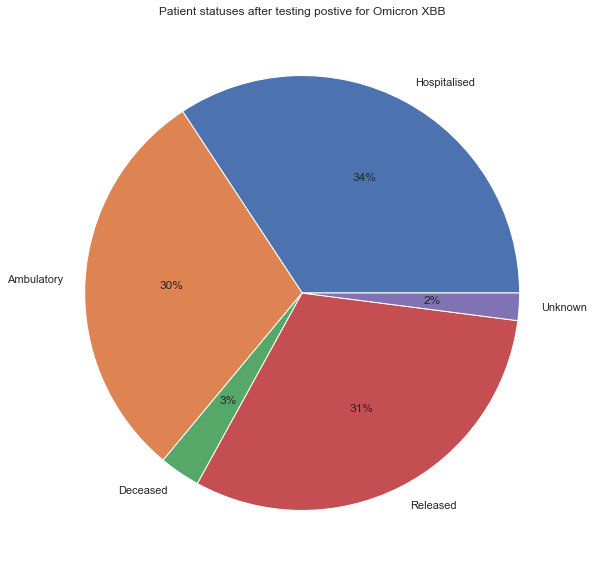

<Figure size 7200x4800 with 0 Axes>

In [13]:
patient_status_list = list(patient_data['Patient status'])
patient_status = dict(Counter(patient_status_list))

# above code was deactivated in favour of the one below because it was  giving a noisy chart

generalised_patient_status = ('Hospitalised','Ambulatory','Deceased','Released','Unknown')
patient_numbers = (135,117,12,122,8) 

labels = list(generalised_patient_status)
size = list(patient_numbers)

sns.set()
plt.figure(figsize=(16,10))
plt.pie(size, labels=labels, autopct='%1.0f%%');
plt.title('Patient statuses after testing postive for Omicron XBB')
plt.figure(dpi=1200); #for image quality

In [14]:
patient_status

{'Hospitalized': 129,
 'Live': 7,
 'unkown': 2,
 'Deceased': 12,
 'PROPER(”OUTPATIENT - HOME MONITORING”)': 1,
 'Outpatient - Home Monitoring': 1,
 'Outpatient - home monitoring': 2,
 'Released': 116,
 'Nasal swab': 6,
 'Stable': 1,
 'Outpatient': 2,
 'not vaccinated': 1,
 'Nasopharyngeal and oropharyngeal swab': 8,
 'Nasopharyngeal swab': 1,
 'Asymptomatic': 2,
 'Alive': 5,
 'Ambulatory': 102,
 nan: 6,
 'Symptomatic and Hospitalized': 1,
 'Nasal Swab': 4,
 'Symptoms: fever, general disconfort, muscle or joint pain, headache, rhinorrhea, vomiting or diarrhea.': 1,
 'Symptoms: general disconfort, muscle or joint pain, headache, cough, odynophagia, rhinorrhea.': 1,
 'Symptoms: fever, general disconfort, muscle or joint pain, headache, cough, odynophagia, vomiting and diarrhea.': 1,
 'Symptoms: fever, general disconfort, headache, cough, rhinorrhea.': 1,
 'Symptomatic - Hospitalized': 1}

So from the generated pie chart above, it is clear that 34% of patients from Omicron XBB are hospitalised with 3% dying from the disease and 31% released. 30% of COVID-19 patients infected by Omicron XBB are Ambulatory or are not hospitalised. It is from these stats that medical professionals can deduce how deadly or a health burden the Omicron XBB is, which helps them put health measures to curb the virus.

Hypothetically speaking, with Big data or use of millions of biological sequences, there is increase in the accuracy of insights generated due to a large number of samples to pick from. However, as the data increases in size, it becomes tedious and time-consuming to look for individual unknowns or errors. Thorugh accumulation of these unknowns or errors, the data accumulates noise which might disrupt smooth execution by algorithms used in the downstream processes. Besides smooth execution of well-crafted small data, it is also faster to generate insights so you can be left with more time to analyse your data extracting useful information from it. The only price to pay is to well-craft it.